In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set()

In [2]:
test_df = pd.read_csv('./titanic-test.csv')
train_df = pd.read_csv('./titanic-train.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


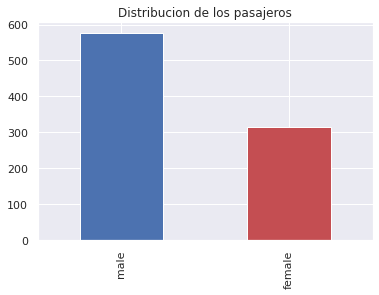

In [5]:
train_df["Sex"].value_counts().plot(kind='bar', color = ['b', 'r'])
plt.title('Distribucion de los pasajeros')
plt.show()

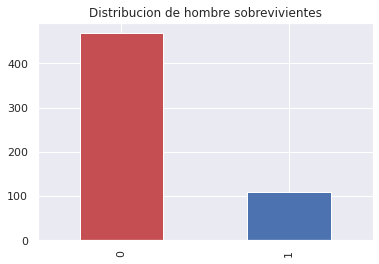

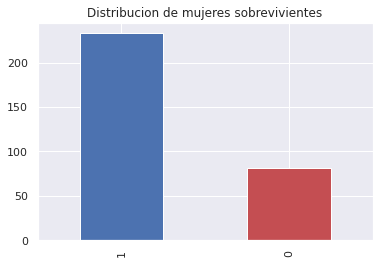

In [6]:
men = train_df.loc[train_df['Sex'] == 'male']
women = train_df.loc[train_df['Sex'] == 'female']

men.Survived.value_counts().plot(kind='bar', color=['r', 'b'])
plt.title('Distribucion de hombre sobrevivientes')
plt.show()

women.Survived.value_counts().plot(kind='bar', color=['b', 'r'])
plt.title('Distribucion de mujeres sobrevivientes')
plt.show()


Text(0.5, 1.0, 'Distribucion de sobrevivientes hombres vs mujeres')

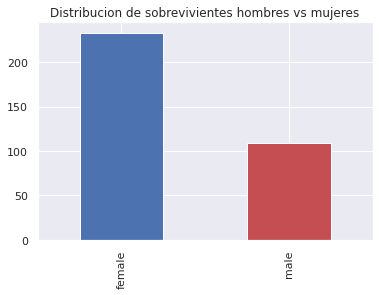

In [7]:
train_df[train_df['Survived'] == 1]['Sex'].value_counts().plot(
    kind='bar', color=['b', 'r'])
plt.title('Distribucion de sobrevivientes hombres vs mujeres')


In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

encoder_sex = label_encoder.fit_transform(train_df['Sex'])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
print(train_df['Age'].mean())
print(train_df['Age'].median())
print(train_df['Age'].mode())

29.69911764705882
28.0
0    24.0
dtype: float64


In [10]:
# una posible opcion para rellenar los datos nulos
# es rellenarlos con la mediana
#
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [11]:
train_predictors = train_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

categorical_cols = [cname for cname in train_predictors.columns if
                      train_predictors[cname].nunique() < 10 and
                      train_predictors[cname].dtype == 'object'
                  ]

In [12]:
categorical_cols


['Sex', 'Embarked']

In [13]:
numerical_cols = [
  cname for cname in train_predictors.columns if
    train_predictors[cname].dtype in ['int64', 'float64']
]
numerical_cols


['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [14]:
my_cols = categorical_cols + numerical_cols

train_predictors = train_predictors[my_cols]

train_predictors.head()

,Sex,Embarked,Pclass,Age,SibSp,Parch,Fare
0,male,S,3,22.0,1,0,7.2500
1,female,C,1,38.0,1,0,71.2833
2,female,S,3,26.0,0,0,7.9250
3,female,S,1,35.0,1,0,53.1000
4,male,S,3,35.0,0,0,8.0500


In [15]:
dummy_encoded_train_predictors = pd.get_dummies(train_predictors)
dummy_encoded_train_predictors


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [16]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [17]:
y_target = train_df['Survived'].values
x_features_one = dummy_encoded_train_predictors.values

x_train, x_validation, y_train, y_validation = train_test_split(
  x_features_one,
  y_target,
  test_size= .25,
  random_state=1
)

In [18]:
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_train, y_train)



La score no es una buena medida para saber la eficacia de un modelo de clasificacion por multiples razones, una de ellas es que la score da el mismo costo a un falso positivo y a un falso negativo y dependiendo del problema que estemos tratando tener un falso negativo puede ser mucho peor que un falso positivo

In [19]:
tree_one_accuracy = round(tree_one.score(x_validation, y_validation), 4)
print('Accuracy: %0.4f'% (tree_one_accuracy))

Accuracy: 0.7399


In [ ]:
from io import StringIO
from IPython.display import display, Image
import pydotplus

out = StringIO()

tree.export_graphviz(tree_one, out_file = out)

graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png('titanic.png')